# title- bike demand count on rent #


## Description ##

In [1]:
# load important library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# check working directory
os.getcwd()

'C:\\Users\\vashi\\OneDrive\\python programs\\bike-count-prediction'

In [3]:
# load dataset
df=pd.read_csv("day.csv",index_col=[0])

In [4]:
#summary of dataset
print(df.shape)
print("#"*50)
print(df.info())
print("#"*50)
print(df.describe())

(731, 15)
##################################################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB
None
##################################################
           season

## outlier analysis ##

In [5]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [6]:
df=df.rename(columns={'dteday':'date','yr':'year','mnth':'month','weathersit':'weather_condition','temp':'temperature','atemp':'feeling_temperature',
                     'hum':'humidity','cnt':'total_count'})

In [7]:
cnames = ['temperature', 'feeling_temperature', 'humidity', 'windspeed','total_count']

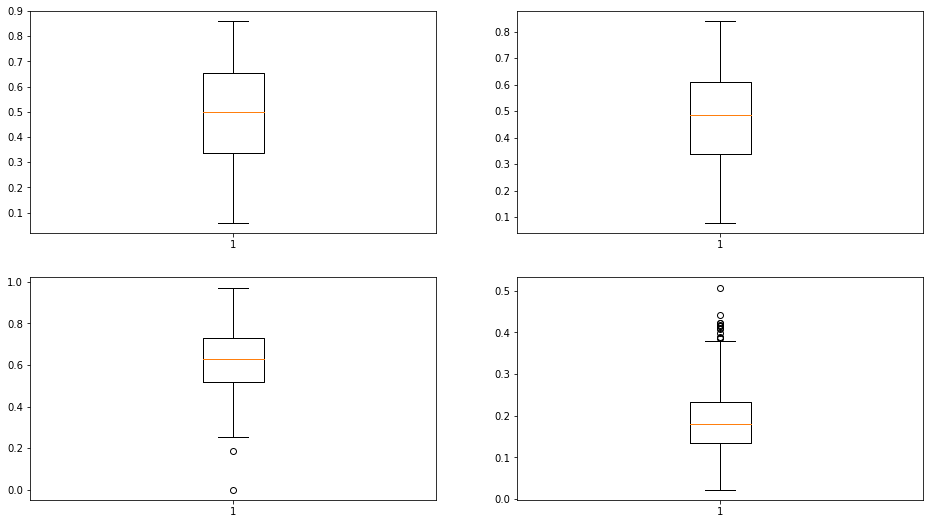

In [8]:
plt.figure(figsize=(16,9))
plt.subplot(221)
plt.boxplot(df['temperature'])
plt.subplot(222)
plt.boxplot(df['feeling_temperature'])
plt.subplot(223)
plt.boxplot(df['humidity'])
plt.subplot(224)
plt.boxplot(df['windspeed'])
plt.show()

In [9]:
for i in cnames:
    
    q1,q3 = np.percentile(df.loc[:,i],[25,75])
    iqr = q3-q1
    min_q = q1 - 1.5*iqr
    max_q = q3 + 1.5*iqr
    df.loc[df[i]<min_q,i]=np.nan
    df.loc[df[i]>max_q,i]=np.nan
    
    

In [10]:
#now check outliers as missing values
df.isnull().sum()

date                    0
season                  0
year                    0
month                   0
holiday                 0
weekday                 0
workingday              0
weather_condition       0
temperature             0
feeling_temperature     0
humidity                2
windspeed              13
casual                  0
registered              0
total_count             0
dtype: int64

In [11]:
#we have total 15 outliers as missing value
#fill these values by mean value
df.fillna(df.mean(),inplace=True)

## feature selection

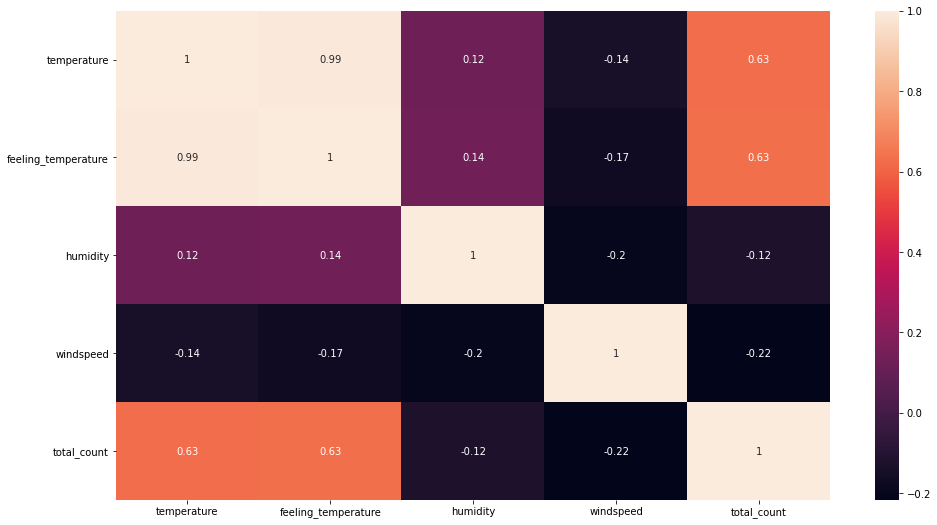

In [12]:
#corrplot
df_corr=df[cnames].corr()
plt.figure(figsize=(16,9))
sns.heatmap(df_corr,annot=True)

Text(0.5, 0, 'humiidity')

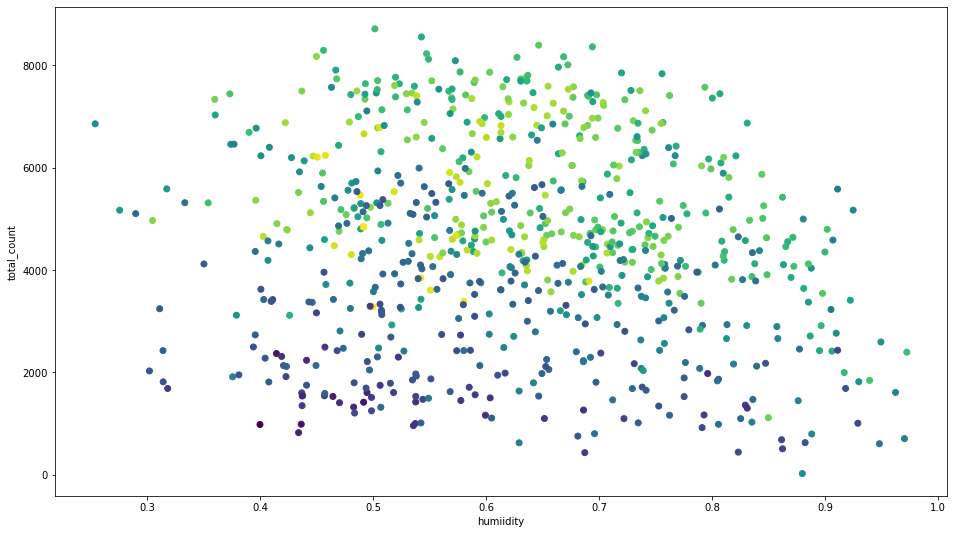

In [13]:
plt.figure(figsize=(16,9))
plt.scatter(df['humidity'],df['total_count'],c=df['temperature'])
plt.ylabel('total_count')
plt.xlabel('humiidity')


Text(0, 0.5, 'total_count')

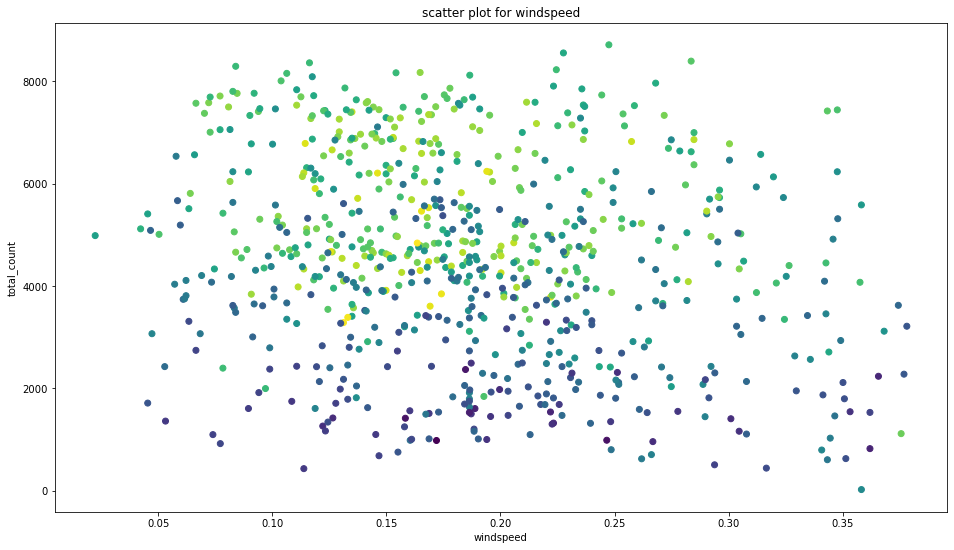

In [14]:
plt.figure(figsize=(16,9))
plt.scatter(df['windspeed'],df['total_count'],c=df['temperature'])
plt.title('scatter plot for windspeed')
plt.xlabel('windspeed')
plt.ylabel('total_count')

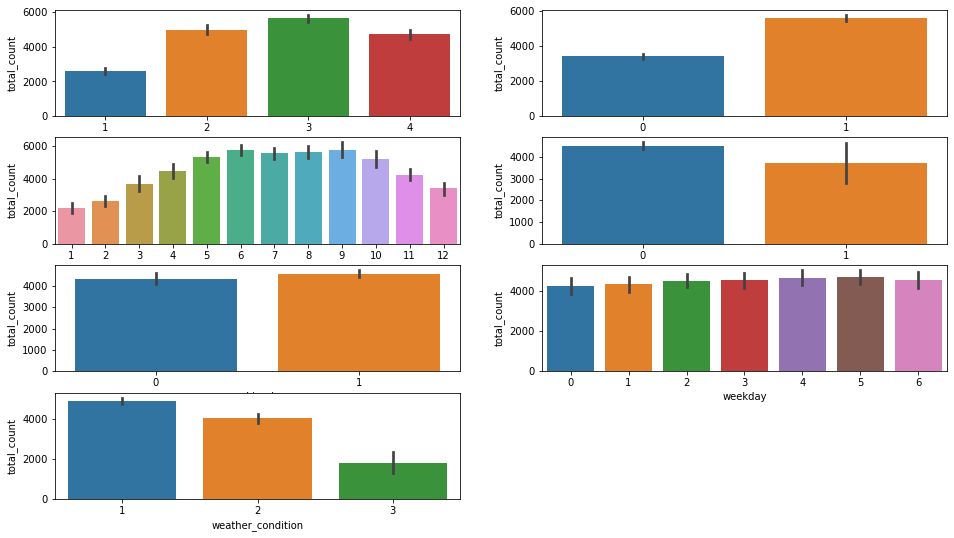

In [15]:
#impact of categorical data on total count
plt.figure(figsize=(16,9))
plt.subplot(421)
sns.barplot(df['season'],df['total_count'])
plt.subplot(422)
sns.barplot(df['year'],df['total_count'])
plt.subplot(423)
sns.barplot(df['month'],df['total_count'])
plt.subplot(424)
sns.barplot(df['holiday'],df['total_count'])
plt.subplot(425)
sns.barplot(df['workingday'],df['total_count'])
plt.subplot(426)
sns.barplot(df['weekday'],df['total_count'])
plt.subplot(427)
sns.barplot(df['weather_condition'],df['total_count'])

In [16]:
# remove date, holiday, workingday, weekday, feeling_temperature,humidity,windspeed, casual and registered from the data set
df= df.drop(['date','holiday','workingday','weekday','feeling_temperature','humidity','windspeed','casual','registered'],axis=1)

In [17]:
print(df)

         season  year  month  weather_condition  temperature  total_count
instant                                                                  
1             1     0      1                  2     0.344167        985.0
2             1     0      1                  2     0.363478        801.0
3             1     0      1                  1     0.196364       1349.0
4             1     0      1                  1     0.200000       1562.0
5             1     0      1                  1     0.226957       1600.0
...         ...   ...    ...                ...          ...          ...
727           1     1     12                  2     0.254167       2114.0
728           1     1     12                  2     0.253333       3095.0
729           1     1     12                  2     0.253333       1341.0
730           1     1     12                  1     0.255833       1796.0
731           1     1     12                  2     0.215833       2729.0

[731 rows x 6 columns]


# model building

In [18]:
# import train_test_split
from sklearn.model_selection import train_test_split

#Divide data into train and test
X = df.values[:, 0:5]
Y = df.values[:,5]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

### linear regression

In [19]:
from sklearn.linear_model import LinearRegression

#create linear regression model
lr = LinearRegression()

# fit and train the model
lr = lr.fit(X_train, y_train)

# prediction using selected model
y_pred_lr = lr.predict(X_test)


In [20]:
## evaluation of linear model using r2 score
## r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lr)


0.7739407661591964

### knn method|

In [21]:
from sklearn.neighbors import KNeighborsRegressor
#create model
knn = KNeighborsRegressor(n_neighbors=5)

#fit the model
knn = knn.fit(X_train, y_train)

#predictions
y_pred_knn = knn.predict(X_test)

# r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_knn)


0.8585077237767456

### random forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
#create rf model
rf = RandomForestRegressor(n_estimators=100)

#fit rf model
rf = rf.fit(X_train, y_train)

# prediction using rf
y_pred_rf = rf.predict(X_test)

# r2 score
r2_score(y_test, y_pred_rf)

0.8709062918372321